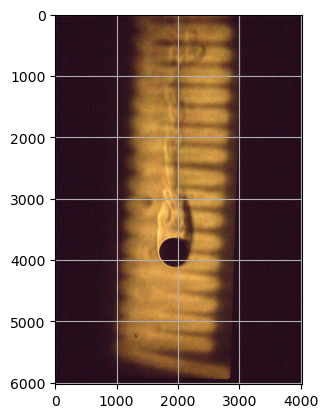

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as im
from skimage.feature import canny
from skimage.transform import hough_circle, hough_circle_peaks
import matplotlib.patches as patch

#Gebe Namen des Test Bildes an und probiert rum, baut schleifen etc. Am besten neue tols für jede Messreihe!
image_folder_path = "png_images"
image_name = "YOUR_IMAGE.png"
output_folder = "kantentest"

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

plt.imshow(plt.imread(f"{image_folder_path}/{image_name}"))
plt.grid()
plt.show()

In [2]:

""" Bitte nutzen das obrige Bild für eine grobe eingrenzung der Region in dem sich die Kugel 
befindet, dabei sind die jeweiligen axenbeschriftungen zu beachten.
top und bottom sind die Grenzen in y-Richtung, left und right in x-Richtung.
low und high sind die Grenzen für den Canny-Filter, wobei low < high gelten muss.
"""
top = 3500
bottom = 4300
left = 1300
right = 2300

low = 0.3
high = 0.3

image = plt.imread(f"{image_folder_path}/{image_name}")[top:bottom,left:right]


grey = np.mean(image, -1)

for high in np.linspace(0,0.9,10):
    for low in np.linspace(0,high,int(high*10+1)):
        edges = canny(grey, low_threshold = low, high_threshold = high)
        im.imsave("kantentest/h%f_l%f.png" %(high, low), arr = edges+grey/4    )